In [2]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import pylab   as plt

In [3]:
# hSBM specific libraries
from non_hsbm import non_hsbm
import graph_tool.all as gt

In [4]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [5]:
file = open('SBM_full_simple_model.pickle', 'rb')
model = pickle.load(file)

In [6]:
synth_file = open('synth_SBM_full_simple_model.pickle', 'rb')
synth_model = pickle.load(synth_file)

In [10]:
df = pd.DataFrame(data=0, index=[i for i in range(38417)], columns=[i for i in range(38417, (len(model.state.g.get_vertices())))])

for document in range(38417):
    neighbors = model.state.g.get_all_neighbors(document)
    if neighbors.size == 0:
        continue
    else:
        for col in df.columns:
            if col in neighbors:
                df[col][document] = 1
df

,38417,38418,38419,38420,38421,38422,38423,38424,38425,38426,...,38437,38438,38439,38440,38441,38442,38443,38444,38445,38446
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38412,0,0,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
38413,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38414,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
38415,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
for v in model.state.g.vertices():
    if model.state.g.vp['kind'][v]==1:
        print('name: %s , index: %d' % (model.state.g.vp['name'][v], v))

name: hypertension , index: 38417
name: diabetes_complicated , index: 38418
name: renal_failure , index: 38419
name: liver_disease , index: 38420
name: cardiac_arrhythmias , index: 38421
name: lymphoma , index: 38422
name: fluid_electrolyte , index: 38423
name: depression , index: 38424
name: peripheral_vascular , index: 38425
name: diabetes_uncomplicated , index: 38426
name: obesity , index: 38427
name: metastatic_cancer , index: 38428
name: drug_abuse , index: 38429
name: other_neurological , index: 38430
name: congestive_heart_failure , index: 38431
name: chronic_pulmonary , index: 38432
name: valvular_disease , index: 38433
name: coagulopathy , index: 38434
name: deficiency_anemias , index: 38435
name: alcohol_abuse , index: 38436
name: hypothyroidism , index: 38437
name: paralysis , index: 38438
name: pulmonary_circulation , index: 38439
name: solid_tumor , index: 38440
name: weight_loss , index: 38441
name: blood_loss_anemia , index: 38442
name: peptic_ulcer , index: 38443
name: 

In [11]:
df = df.rename(columns={38417: "hypertension",
38418: "diabetes_complicated",
38419: "renal_failure",
38420: "liver_disease",
38421: "cardiac_arrhythmias",
38422: "lymphoma",
38423: "fluid_electrolyte",
38424: "depression",
38425: "peripheral_vascular",
38426: "diabetes_uncomplicated",
38427: "obesity",
38428: "metastatic_cancer",
38429: "drug_abuse",
38430: "other_neurological",
38431: "congestive_heart_failure",
38432: "chronic_pulmonary",
38433: "valvular_disease",
38434: "coagulopathy",
38435: "deficiency_anemias",
38436: "alcohol_abuse",
38437: "hypothyroidism",
38438: "paralysis",
38439: "pulmonary_circulation",
38440: "solid_tumor",
38441: "weight_loss",
38442: "blood_loss_anemia",
38443: "peptic_ulcer",
38444: "psychoses",
38445: "aids",
38446: "rheumatoid_arthritis"})
df

,hypertension,diabetes_complicated,renal_failure,liver_disease,cardiac_arrhythmias,lymphoma,fluid_electrolyte,depression,peripheral_vascular,diabetes_uncomplicated,...,hypothyroidism,paralysis,pulmonary_circulation,solid_tumor,weight_loss,blood_loss_anemia,peptic_ulcer,psychoses,aids,rheumatoid_arthritis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38412,0,0,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
38413,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38414,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
38415,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
sample_df = df.sample(n=6000, replace=False)
sample_df = sample_df.sort_index()

In [50]:
sample_patients = [h.split()[0] for h in sample_df.index.values.astype('str')]              
sample_features = [[t for t in patient if t != 0] for patient in sample_df.values.tolist()] 
sample_model = non_hsbm()                                          ## we create an instance of the sbmtm-class
sample_model.make_graph(sample_features,documents=sample_patients,counts=False)

In [85]:
pos = gt.sfdp_layout(sample_model.g)
gt.graph_draw(sample_model.g, pos=pos, edge_pen_width=1.9, output_size=(600, 600), output="SBM_full_simple_bipartite_network.svg")

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f9ccf49d4c0, at 0x7f9ccf49cf10>

In [6]:
synth_df = pd.DataFrame(data=0, index=[i for i in range(38417)], columns=[i for i in range(38417, (len(synth_model.g.get_vertices())))])
for document in range(38417):
    neighbors = synth_model.g.get_all_neighbors(document)
    if neighbors.size == 0:
        continue
    else:
        for col in synth_df.columns:
            if col in neighbors:
                synth_df[col][document] = 1
synth_df

,38417,38418,38419,38420,38421,38422,38423,38424,38425,38426,...,38437,38438,38439,38440,38441,38442,38443,38444,38445,38446
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38412,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38413,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
38414,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38415,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
synth_df = synth_df.rename(columns={38417: "hypertension",
38418: "diabetes_complicated",
38419: "renal_failure",
38420: "liver_disease",
38421: "cardiac_arrhythmias",
38422: "lymphoma",
38423: "fluid_electrolyte",
38424: "depression",
38425: "peripheral_vascular",
38426: "diabetes_uncomplicated",
38427: "obesity",
38428: "metastatic_cancer",
38429: "drug_abuse",
38430: "other_neurological",
38431: "congestive_heart_failure",
38432: "chronic_pulmonary",
38433: "valvular_disease",
38434: "coagulopathy",
38435: "deficiency_anemias",
38436: "alcohol_abuse",
38437: "hypothyroidism",
38438: "paralysis",
38439: "pulmonary_circulation",
38440: "solid_tumor",
38441: "weight_loss",
38442: "blood_loss_anemia",
38443: "peptic_ulcer",
38444: "psychoses",
38445: "aids",
38446: "rheumatoid_arthritis"})

In [12]:
df = df[['liver_disease', 'fluid_electrolyte', 'depression', 'drug_abuse',
       'other_neurological', 'coagulopathy', 'deficiency_anemias',
       'alcohol_abuse', 'solid_tumor', 'weight_loss', 'blood_loss_anemia',
       'peptic_ulcer', 'psychoses', 'aids', 'hypertension',
       'diabetes_complicated', 'renal_failure', 'cardiac_arrhythmias',
       'lymphoma', 'peripheral_vascular', 'diabetes_uncomplicated', 'obesity',
       'metastatic_cancer', 'congestive_heart_failure', 'chronic_pulmonary',
       'valvular_disease', 'hypothyroidism', 'paralysis',
       'pulmonary_circulation', 'rheumatoid_arthritis']]

In [8]:
synth_df = synth_df[['liver_disease', 'fluid_electrolyte', 'depression', 'drug_abuse',
       'other_neurological', 'coagulopathy', 'deficiency_anemias',
       'alcohol_abuse', 'solid_tumor', 'weight_loss', 'blood_loss_anemia',
       'peptic_ulcer', 'psychoses', 'aids', 'hypertension',
       'diabetes_complicated', 'renal_failure', 'cardiac_arrhythmias',
       'lymphoma', 'peripheral_vascular', 'diabetes_uncomplicated', 'obesity',
       'metastatic_cancer', 'congestive_heart_failure', 'chronic_pulmonary',
       'valvular_disease', 'hypothyroidism', 'paralysis',
       'pulmonary_circulation', 'rheumatoid_arthritis']]

In [13]:
print(set(model.state.get_blocks().a))
for j in set(model.state.get_blocks().a):
    print(len([i for i in model.state.get_blocks().a if i == j]))

{38424, 26552, 38425, 38427, 5596}
4
37973
22
4
444


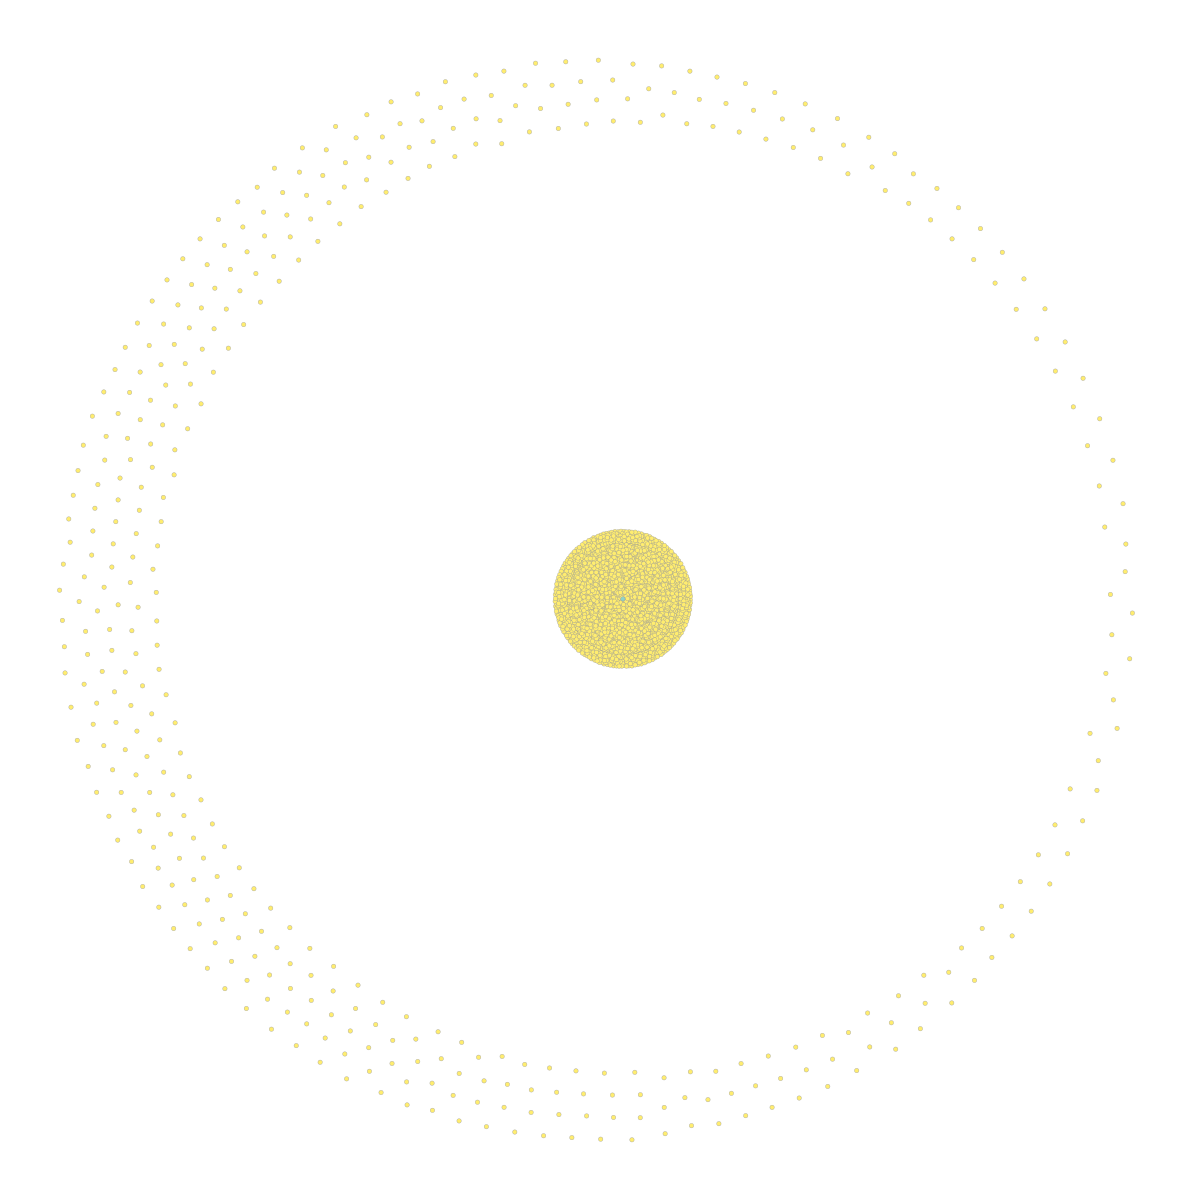

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f9ccf49d4c0, at 0x7f9cce5b4dc0>

In [122]:
is_bi, part = gt.is_bipartite(sample_model.g, partition=True)
gt.graph_draw(sample_model.g, vertex_fill_color=part)

In [22]:
clusters = model.state.get_blocks().a[0:38417]
clusters = np.where(clusters.astype(str) == '5596', "A", clusters)
clusters = np.where(clusters.astype(str) == '26552', "B",clusters)
df['cluster'] = clusters
df

,liver_disease,fluid_electrolyte,depression,drug_abuse,other_neurological,coagulopathy,deficiency_anemias,alcohol_abuse,solid_tumor,weight_loss,...,obesity,metastatic_cancer,congestive_heart_failure,chronic_pulmonary,valvular_disease,hypothyroidism,paralysis,pulmonary_circulation,rheumatoid_arthritis,cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38412,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,B
38413,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,B
38414,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,B
38415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B


In [9]:
print(set(synth_model.get_blocks().a))
for j in set(synth_model.get_blocks().a):
    print(len([i for i in synth_model.get_blocks().a if i == j]))

{38432, 1, 38438, 21287, 38442, 38446, 38418, 38422, 38427, 38428, 38431}
5
2
4
38417
5
1
2
5
2
1
3


In [18]:
synth_clusters = synth_model.get_blocks().a[0:38417]
synth_clusters = np.where(synth_clusters.astype(str) == '5320', "A", synth_clusters)
synth_df['cluster'] = synth_clusters
synth_df

,liver_disease,fluid_electrolyte,depression,drug_abuse,other_neurological,coagulopathy,deficiency_anemias,alcohol_abuse,solid_tumor,weight_loss,...,obesity,metastatic_cancer,congestive_heart_failure,chronic_pulmonary,valvular_disease,hypothyroidism,paralysis,pulmonary_circulation,rheumatoid_arthritis,cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21287
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,21287
2,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,21287
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,21287
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,21287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38412,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,21287
38413,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21287
38414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,21287
38415,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,21287


In [14]:
df = pd.read_csv("SBM_full_simple_elixhauser_comorbidity.csv")
synth_df = pd.read_csv("synth_SBM_full_simple_elixhauser_comorbidity.csv")

In [20]:
def count_df(df):
    df_count = df.copy()
    df_count['count'] = df_count.sum(axis=1)
    cluster_set = list(dict.fromkeys(df_count['cluster']))
    cluster_df = pd.DataFrame({cluster_set[0]: df_count[df_count['cluster'] == cluster_set[0]]['count'].value_counts()})
    if len(cluster_set) > 1:
        for cluster in cluster_set[1:]:
            cluster_counts = df_count[df_count['cluster'] == cluster]
            cluster_df = cluster_df.join(pd.DataFrame({cluster :cluster_counts['count'].value_counts()}), how='outer')
    cluster_df = cluster_df.fillna(0)
    return cluster_df

/tmp/ipykernel_29946/4269198207.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_count['count'] = df_count.sum(axis=1)


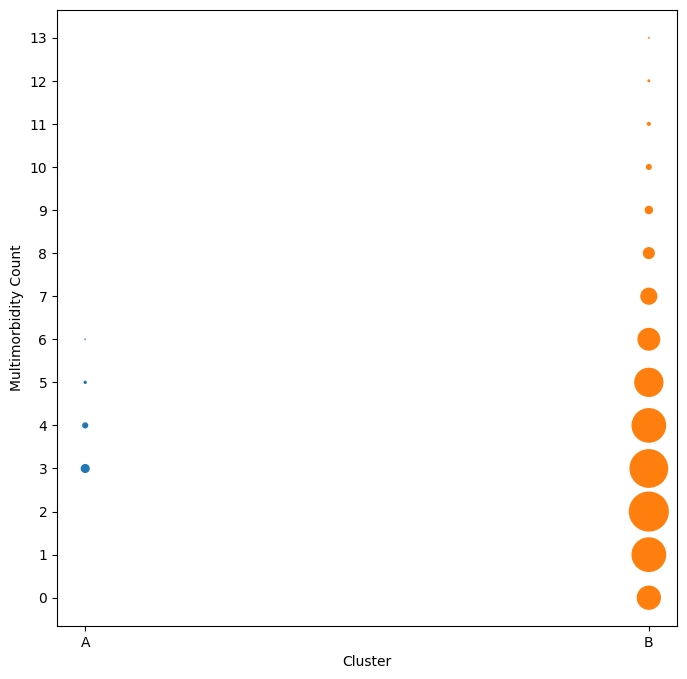

In [25]:
cluster_df = count_df(df)
cluster_df = cluster_df[["A", "B"]]

fig, ax = plt.subplots(figsize=(8, 8))
for i, col in enumerate(cluster_df.columns):
    ax.scatter([i] * len(cluster_df), cluster_df.index.to_list(), s=cluster_df[col]*0.1, label=col)

ax.set_xlabel('Cluster')
ax.set_xticks(range(len(cluster_df.columns)))
ax.set_xticklabels(cluster_df.columns)
ax.set_ylabel('Multimorbidity Count')
ax.set_yticks(cluster_df.index)
ax.set_yticklabels(cluster_df.index)
plt.show()

In [1]:
synth_cluster_df = count_df(synth_df)

fig, ax = plt.subplots(figsize=(8, 8))
for i, col in enumerate(synth_cluster_df.columns):
    ax.scatter([i] * len(synth_cluster_df), synth_cluster_df.index.to_list(), s=synth_cluster_df[col]*0.1, label=col)

ax.set_xlabel('Cluster')
ax.set_xticks(range(len(synth_cluster_df.columns)))
ax.set_xticklabels(synth_cluster_df.columns)
ax.set_ylabel('Multimorbidity Count')
ax.set_yticks(synth_cluster_df.index)
ax.set_yticklabels(synth_cluster_df.index)
plt.show()

NameError: name 'count_df' is not defined

In [129]:
df.to_csv('SBM_full_simple_elixhauser_comorbidity.csv', index=False)
synth_df.to_csv('synth_SBM_full_simple_elixhauser_comorbidity.csv', index=False)

In [132]:
print(model.state.entropy())
print(synth_model.entropy())

335432.701720714
339524.94399965205


In [134]:
gt.similarity(model.state.g, synth_model.g)

0.2464358792333069

In [144]:
from sklearn.metrics.cluster import adjusted_rand_score

df_inner_clusters = df['cluster'].to_list()
synth_df_inner_clusters = synth_df['cluster'].to_list()
clusters_similarity = adjusted_rand_score(df_inner_clusters, synth_df_inner_clusters)
clusters_similarity

0.0

In [146]:
from sklearn.metrics import jaccard_score, f1_score

jaccard_sim = jaccard_score(df.iloc[:, 0:30].to_numpy(), synth_df.iloc[:, 0:30].to_numpy(), average="samples", zero_division=1)
print("Jaccard similarity coefficient:", jaccard_sim)

Jaccard similarity coefficient: 0.19666061057160045


In [147]:
from scipy.stats import kstest
from scipy.stats import ks_2samp
from statistics import mean

pvalue_avg = []
for i in range(df.iloc[:, 0:30].to_numpy().shape[1]):
    p_value = kstest(df.iloc[:, 0:30].to_numpy()[:,i], synth_df.iloc[:, 0:30].to_numpy()[:,i]).pvalue
    pvalue_avg.append(p_value)
    print(f"Column {i}: p-value = {p_value}")
mean(pvalue_avg)

Column 0: p-value = 0.14299432062873962
Column 1: p-value = 7.292732770124338e-40
Column 2: p-value = 0.5822544518856774
Column 3: p-value = 0.9748130137974422
Column 4: p-value = 0.14299432062873962
Column 5: p-value = 0.06940097198422168
Column 6: p-value = 1.0
Column 7: p-value = 0.7798649963864592
Column 8: p-value = 1.0
Column 9: p-value = 0.9999999975965971
Column 10: p-value = 1.0
Column 11: p-value = 1.0
Column 12: p-value = 1.0
Column 13: p-value = 1.0
Column 14: p-value = 0.0
Column 15: p-value = 0.9999999999999998
Column 16: p-value = 0.17935363945127647
Column 17: p-value = 1.7654816700220995e-78
Column 18: p-value = 1.0
Column 19: p-value = 0.5407536116446409
Column 20: p-value = 1.2797377339407477e-08
Column 21: p-value = 0.9999999999999968
Column 22: p-value = 0.9987156544707373
Column 23: p-value = 1.341094181330315e-22
Column 24: p-value = 1.8866443327534694e-13
Column 25: p-value = 0.26181558278891115
Column 26: p-value = 0.3786480936710257
Column 27: p-value = 1.0
Co

0.6017202884083794

In [148]:
check_model = pickle.load(open('SBM_full_simple_model.pickle', 'rb'))

In [26]:
print(model.state.entropy())
print(synth_model.entropy())

335432.701720714
346267.6917066462
